#### Imports

In [1]:
import pandas as pd
from spacy.lang.en import English
import spacy

# Create the nlp object
nlp = spacy.load('en_core_web_lg')

In [47]:
import warnings
warnings.filterwarnings('ignore')

#### Reading in Data

In [2]:
df = pd.read_csv('./data/raw_combined_posts.csv')[['text']]
print('There are {} rows and {} column of text data.'.format(df.shape[0], 
                                                             df.shape[1]))
df.head()

There are 1403 rows and 1 column of text data.


,text
0,I'm trying to find someone who is using Qualia...
1,Most food tracking apps have the ability to re...
2,Why do you audio-video record your life? What ...
3,This seems to be a major privacy concern for l...
4,"If you've done your introductory stats, you kn..."


In [3]:
print("Checking for null values...\n{}\n".format(df.isnull().sum()))
print('Checking how many empty string values in text column of dataframe...\n{}'.format(df['text'][df['text'] == ""].shape[0]))

Checking for null values...
text    0
dtype: int64

Checking how many empty string values in text column of dataframe...
0


#### Creating `corpus` of all text.

In [5]:
# Create corpus of all text. 
corpus = ''
for row in df['text']:
    corpus += row
print("The corpus length is: {}\n".format(len(corpus)))
print("First 2,000 characters of corpus:\n\n {}".format(corpus[:2_000]))

The corpus length is: 1353226

First 2,000 characters of corpus:

 I'm trying to find someone who is using Qualia Mind and tracking their sleep with an Oura ring. If you are, would you mind sharing your data and experiences for my blog review?

I need to confirm a finding I've made.

I've been taking Qualia Mind for a month now (Yes I am affiliated with it, but I'm not using any affiliate links here) and my deep sleep has sky rocketed!

I used to sit around 15-20% deep sleep on a 8 hour sleep (based on oura ring data).

I've just finished a bottle of qualia mind (caffeine free) and i'm averaging over 30% deep sleep. Nothing else has changed. My highest night yet was 40% deep sleep.

I've just stopped taking it a few days ago, and I'm going to see what happens with my deep sleep - it will be interesting to see if it drops off or stays up for a while.

Full review and my findings will be published in the coming weeks.

For proof of the 40% scores see the bottom of this article - [https:/

### Initial Exploratory Analysis of Raw Text

#### WordCloud of all text.

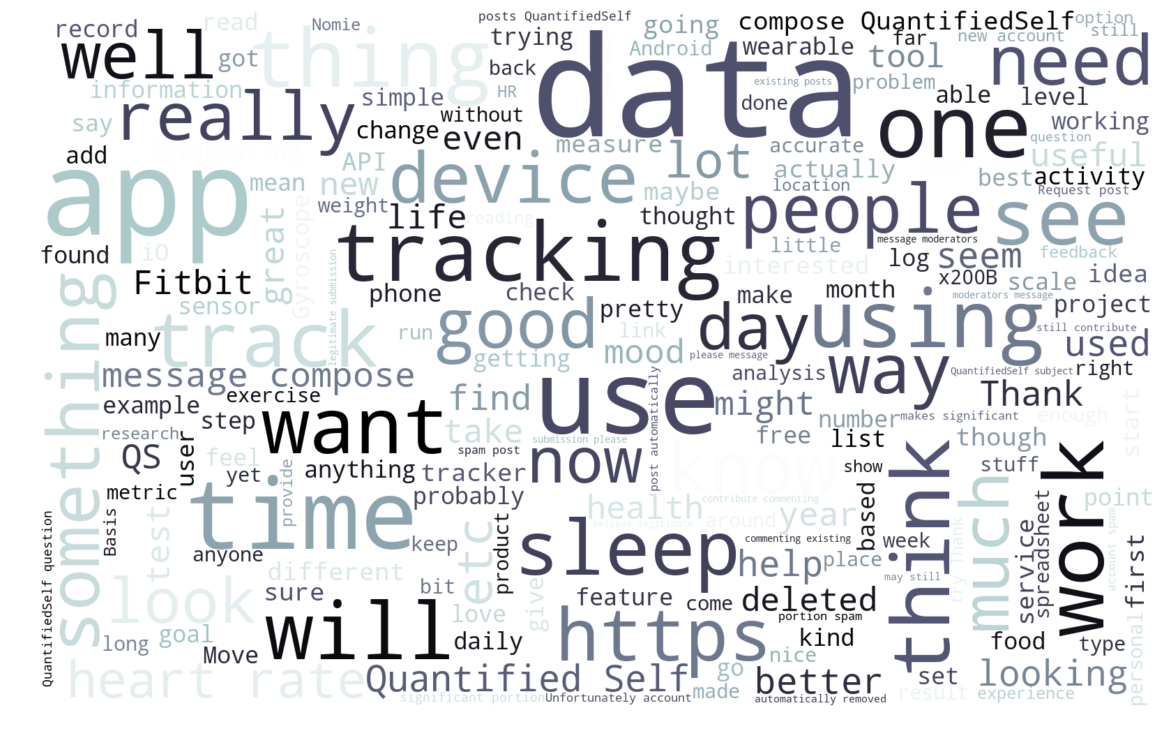

In [6]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Code from Kevin Crystal on project I collaborated in General Assembly's Immersive program.
# https://git.generalassemb.ly/iceberg/DSI-Client-Project/blob/master/02.1_Data_Cleaning_Tweets.ipynb

%matplotlib inline
wordcloud = WordCloud(width=1600, height=1000,
                      max_font_size=200,
                      colormap='bone', 
                      background_color='white').generate(corpus)
plt.figure(figsize=(20,20))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig('./images/word_cloud.png')
plt.show();

#### Frequency Distribution of Most Common Words

In [7]:
# Code from General Assembly's instructor Jacob Koehler's in "text_mining" notebook.
import nltk
from nltk import word_tokenize
nltk_tokens = word_tokenize(corpus)
print("First 15 word tokens: {}".format(nltk_tokens[:15]))

First 15 word tokens: ['I', "'m", 'trying', 'to', 'find', 'someone', 'who', 'is', 'using', 'Qualia', 'Mind', 'and', 'tracking', 'their', 'sleep']


In [8]:
# Code from General Assembly's instructor Jacob Koehler's in "text_mining" notebook.
fdist = nltk.FreqDist(nltk_tokens)
fdist.most_common(10)

[('.', 10261),
 (',', 8938),
 ('I', 6861),
 ('to', 6531),
 ('the', 6531),
 ('a', 5379),
 ('and', 4858),
 ('you', 3866),
 ('of', 3829),
 (')', 3125)]

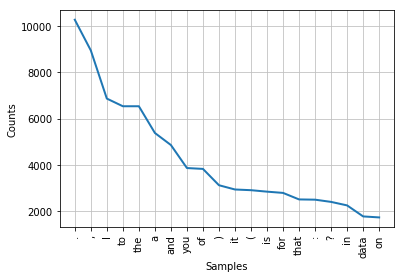

In [9]:
# Frequency distribution plot.
fdist.plot(20)

#### Bar Graph of Most Common Words

In [10]:
# Imports
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Setting x values.
words_lst = []
for word in fdist.most_common(20):
    words_lst.append(word[0])
x = words_lst
print(x)

['.', ',', 'I', 'to', 'the', 'a', 'and', 'you', 'of', ')', 'it', '(', 'is', 'for', 'that', ':', '?', 'in', 'data', 'on']


In [11]:
# Setting y values.
counts_lst = []
for count in fdist.most_common(20):
    counts_lst.append(count[1])
y = counts_lst
print(y)

[10261, 8938, 6861, 6531, 6531, 5379, 4858, 3866, 3829, 3125, 2941, 2911, 2848, 2794, 2513, 2502, 2406, 2255, 1780, 1737]


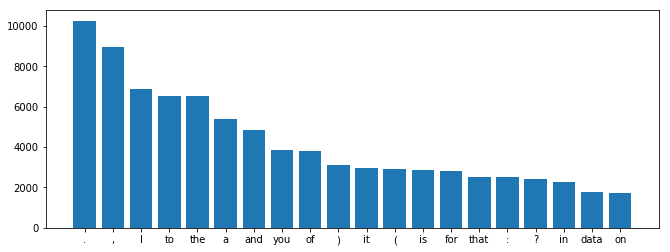

In [12]:
# Bar Graph of Most Common Words
plt.figure(figsize = (11,4))
plt.bar(x, y)
plt.savefig('./images/bar_graph.png');

### Initial Cleaning of Raw Data

In [13]:
def first_cleaning(text):
    
    # Remove html.
    from bs4 import BeautifulSoup
    
    soup    = BeautifulSoup(text, 'html.parser')
    no_html = soup.get_text()
    
    # Remove duplicate text marked by ">"
    import re
    
    no_duplicates = re.sub(">.*", " ", no_html)
    
    # Remove urls.
    no_urls = re.sub("https{0,1}:\/\/\S*", " ", no_duplicates)
    
    # Remove punctuations (except apostraphes and hyphens)
    no_punctuation = re.sub("[^\w\'\-\s]+", " ", no_urls )
    
    # Remove hyphens, but combine hyphenated words.
    no_hyphens = re.sub("-", "", no_punctuation)
    
    # Remove digits.
    no_digits = re.sub("\d", " ", no_hyphens)
    
    # Remove extra whitespace. 
    no_whitespace = " ".join(no_digits.split())
    
    # Viewing first 2,500 characters of text.
    print("First 2,500 characters of corpus after first cleaning:\n\n {}".format(no_whitespace[:2_500]))
    
    return no_whitespace

In [14]:
first_clean_txt = first_cleaning(corpus)

First 2,500 characters of corpus after first cleaning:

 I'm trying to find someone who is using Qualia Mind and tracking their sleep with an Oura ring If you are would you mind sharing your data and experiences for my blog review I need to confirm a finding I've made I've been taking Qualia Mind for a month now Yes I am affiliated with it but I'm not using any affiliate links here and my deep sleep has sky rocketed I used to sit around deep sleep on a hour sleep based on oura ring data I've just finished a bottle of qualia mind caffeine free and i'm averaging over deep sleep Nothing else has changed My highest night yet was deep sleep I've just stopped taking it a few days ago and I'm going to see what happens with my deep sleep it will be interesting to see if it drops off or stays up for a while Full review and my findings will be published in the coming weeks For proof of the scores see the bottom of this article Anyone else here using Qualia Mind Have you found the same thing Or i

#### Removing Default Stopwords.

In [15]:
from spacy.lang.en.stop_words import STOP_WORDS

print("There are {} default stopwords in spaCy.".format(len(STOP_WORDS)))

There are 312 default stopwords in spaCy.


In [16]:
print("Length of first_clean_txt: {}\n".format(len(first_clean_txt)))
print("Times need to run spaCy's nlp method due to character limit (1,000,000):\n{}".format((len(first_clean_txt))/1_000_000))

Length of first_clean_txt: 1179430

Times need to run spaCy's nlp method due to character limit (1,000,000):
1.17943


In [17]:
doc_1 = nlp(first_clean_txt[:1_000_000])
tokens_1 = [token.text for token in doc_1 if not token.is_stop]
print("First 15 tokens (doc_1): {}\n".format(tokens_1[:15]))

doc_2 = nlp(first_clean_txt[1_000_000:])
tokens_2 = [token.text for token in doc_2 if not token.is_stop]
print("First 15 tokens (doc_2): {}\n".format(tokens_2[:15]))

First 15 tokens (doc_1): ['trying', 'find', 'Qualia', 'Mind', 'tracking', 'sleep', 'Oura', 'ring', 'mind', 'sharing', 'data', 'experiences', 'blog', 'review', 'need']

First 15 tokens (doc_2): ['kind', 'testing', 'like', 'eventually', 'regular', 'basis', 'experiment', 'longterm', 'health', 'management', 'regiment', 'level', 'testing', 'test', 'daily']



#### Reintegrating tokens into a corpus.

In [18]:
corpus = ''
for token_1 in tokens_1:
    corpus += token_1
    corpus += " "
for token_2 in tokens_2:
    corpus += token_2
    corpus += " "

print("The corpus length is: {}\n".format(len(corpus)))
print("First 2,500 characters of corpus:\n\n {}".format(corpus[:2_500]))

The corpus length is: 713865

First 2,500 characters of corpus:

 trying find Qualia Mind tracking sleep Oura ring mind sharing data experiences blog review need confirm finding taking Qualia Mind month Yes affiliated affiliate links deep sleep sky rocketed sit deep sleep hour sleep based oura ring data finished bottle qualia mind caffeine free averaging deep sleep changed highest night deep sleep stopped taking days ago going happens deep sleep interesting drops stays review findings published coming weeks proof scores article Qualia Mind found thing average sleep disorder called n sure good reference haha Deep sleep score Qualia Mind Oura Ring Users food tracking apps ability retrieve nutritional info text search barcode scan recent favorites Barcode search works offline typing search ' favorites ' apps handful apps time stamping options Write code USDA database Automate IFTTT Waistline database date cease exist require internet spy user Unfortunately require lots work Waistline adde

### Second Cleaning of Data

In [19]:
def second_cleaning(text):
    
    # Single words removed.
    import re
    no_singles = re.sub(r"\b[a-zA-Z]\b", " ", text)

    # Remove apostraphes that did not get removed with spaCy's stopwords (contractions).
    no_apostraphes = re.sub(r"'", " ", no_singles)

    # Remove extra whitespace.
    no_xspaces = " ".join(no_apostraphes.split())
    
    # Viewing first 2,500 characters of text.
    print("First 2,500 characters of corpus after first cleaning:\n\n {}".format(no_xspaces[:2_500]))
    
    return no_xspaces

In [20]:
second_clean_txt = second_cleaning(corpus)
print("\nLength of second_clean_txt: {}\n".format(len(second_clean_txt)))

First 2,500 characters of corpus after first cleaning:

 trying find Qualia Mind tracking sleep Oura ring mind sharing data experiences blog review need confirm finding taking Qualia Mind month Yes affiliated affiliate links deep sleep sky rocketed sit deep sleep hour sleep based oura ring data finished bottle qualia mind caffeine free averaging deep sleep changed highest night deep sleep stopped taking days ago going happens deep sleep interesting drops stays review findings published coming weeks proof scores article Qualia Mind found thing average sleep disorder called sure good reference haha Deep sleep score Qualia Mind Oura Ring Users food tracking apps ability retrieve nutritional info text search barcode scan recent favorites Barcode search works offline typing search favorites apps handful apps time stamping options Write code USDA database Automate IFTTT Waistline database date cease exist require internet spy user Unfortunately require lots work Waistline added useful featur

#### Visualizing Text

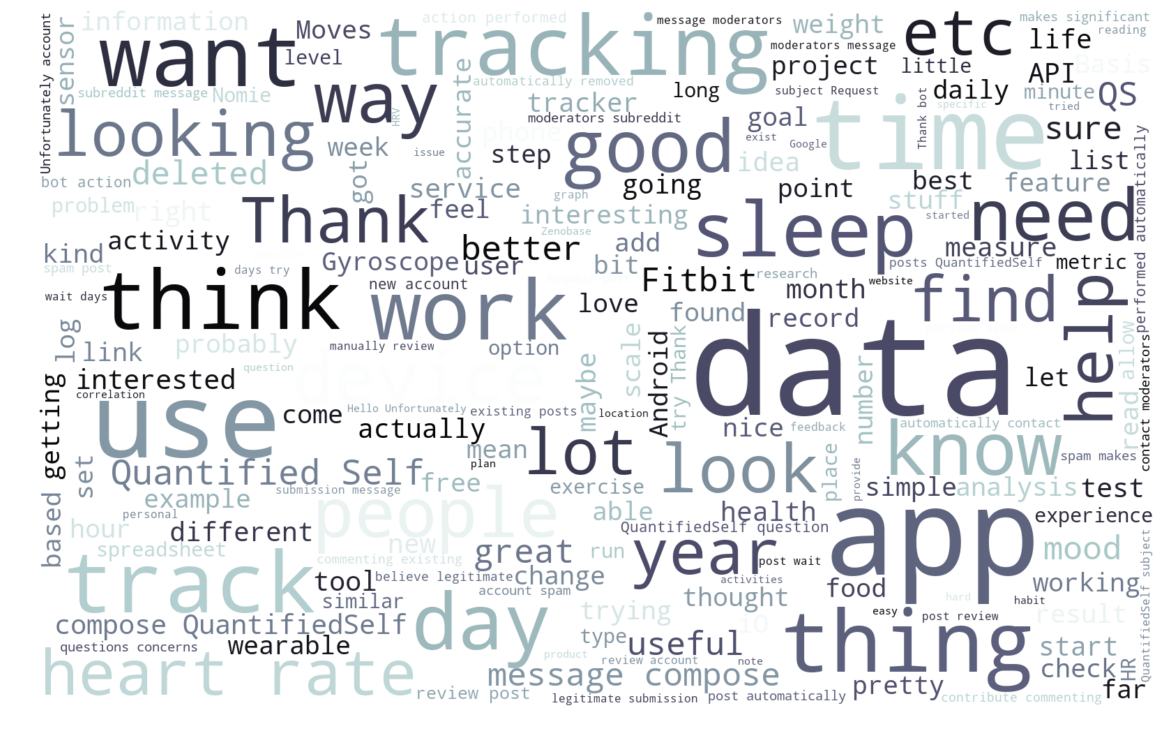

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

%matplotlib inline
wordcloud = WordCloud(width=1600, height=1000,
                      max_font_size=200,
                      colormap='bone', 
                      background_color='white').generate(second_clean_txt)
plt.figure(figsize=(20,20))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig('./images/word_cloud_2.png')
plt.show();

#### Frequency Distribution

In [22]:
nltk_tokens = word_tokenize(second_clean_txt)
print("First 15 word tokens: {}".format(nltk_tokens[:25]))

First 15 word tokens: ['trying', 'find', 'Qualia', 'Mind', 'tracking', 'sleep', 'Oura', 'ring', 'mind', 'sharing', 'data', 'experiences', 'blog', 'review', 'need', 'confirm', 'finding', 'taking', 'Qualia', 'Mind', 'month', 'Yes', 'affiliated', 'affiliate', 'links']


In [23]:
fdist = nltk.FreqDist(nltk_tokens)
print(fdist.most_common(50))

[('data', 1750), ('like', 1001), ('app', 830), ('time', 683), ('use', 643), ('tracking', 620), ('sleep', 571), ('track', 531), ('want', 480), ('day', 435), ('know', 398), ('think', 388), ('good', 378), ('post', 375), ('account', 336), ('apps', 313), ('things', 311), ('way', 303), ('new', 300), ('QuantifiedSelf', 300), ('message', 300), ('work', 299), ('people', 291), ('automatically', 272), ('try', 269), ('need', 259), ('days', 258), ('rate', 256), ('Thanks', 250), ('etc', 246), ('QS', 244), ('heart', 242), ('looking', 240), ('find', 231), ('removed', 228), ('Quantified', 226), ('review', 220), ('Google', 211), ('lot', 208), ('better', 206), ('great', 204), ('mood', 199), ('help', 198), ('questions', 197), ('pretty', 193), ('export', 190), ('useful', 189), ('spam', 187), ('compose', 186), ('deleted', 184)]


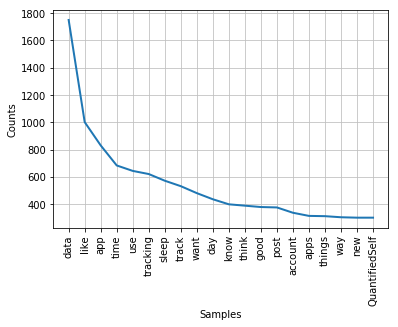

In [24]:
fdist.plot(20);

#### Bar Graph of Most Common Words

In [25]:
# Setting x values.
words_lst = []
for word in fdist.most_common(15):
    words_lst.append(word[0])
x = words_lst
print(x)

['data', 'like', 'app', 'time', 'use', 'tracking', 'sleep', 'track', 'want', 'day', 'know', 'think', 'good', 'post', 'account']


In [26]:
# Setting y values.
counts_lst = []
for count in fdist.most_common(15):
    counts_lst.append(count[1])
y = counts_lst
print(y)

[1750, 1001, 830, 683, 643, 620, 571, 531, 480, 435, 398, 388, 378, 375, 336]


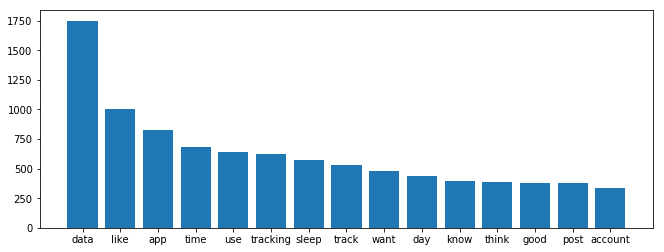

In [27]:
# Bar Graph of Most Common Words
plt.figure(figsize = (11,4))
plt.bar(x, y);
plt.savefig('./images/bar_graph_2.png');

#### Lemmatizing

In [28]:
print("Length of corupus: {}\n".format(len(second_clean_txt)))
print("Times need to run spaCy's nlp method due to character limit (1,000,000):\n{}".format((len(second_clean_txt))/1_000_000))


Length of corupus: 709369

Times need to run spaCy's nlp method due to character limit (1,000,000):
0.709369


In [29]:
doc_lemma = nlp(second_clean_txt)
tokens_lemma = [token.lemma_ for token in doc_lemma]
print("First 15 tokens lemmatized (doc): {}\n".format(tokens_lemma[:50]))

First 15 tokens lemmatized (doc): ['try', 'find', 'Qualia', 'mind', 'tracking', 'sleep', 'Oura', 'ring', 'mind', 'sharing', 'datum', 'experience', 'blog', 'review', 'nee', 'confirm', 'find', 'take', 'Qualia', 'Mind', 'month', 'yes', 'affiliate', 'affiliate', 'link', 'deep', 'sleep', 'sky', 'rocket', 'sit', 'deep', 'sleep', 'hour', 'sleep', 'base', 'oura', 'ring', 'datum', 'finish', 'bottle', 'qualia', 'mind', 'caffeine', 'free', 'average', 'deep', 'sleep', 'change', 'high', 'night']



#### Reintegrating lemmatized tokens into corpus for further EDA.

In [30]:
corpus_lemma = ''
for toke in tokens_lemma:
    corpus_lemma += toke
    corpus_lemma += " "

print("The corpus length is: {}\n".format(len(corpus_lemma)))
print("First 2,500 characters of corpus:\n\n {}".format(corpus_lemma[:2_500]))

The corpus length is: 676659

First 2,500 characters of corpus:

 try find Qualia mind tracking sleep Oura ring mind sharing datum experience blog review nee confirm find take Qualia Mind month yes affiliate affiliate link deep sleep sky rocket sit deep sleep hour sleep base oura ring datum finish bottle qualia mind caffeine free average deep sleep change high night deep sleep stop take day ago go happen deep sleep interesting drop stay review finding publish come week proof score article Qualia Mind find thing average sleep disorder call sure good reference haha deep sleep score Qualia Mind Oura ring Users food tracking app ability retrieve nutritional info text search barcode scan recent favorite Barcode search work offline type search favorite app handful app time stamping option write code USDA database Automate IFTTT waistline database date cease exist require internet spy user unfortunately require lot work waistline add useful feature pay year mfp Chronometer offline log useless

#### Visualizing Lemmatized Words

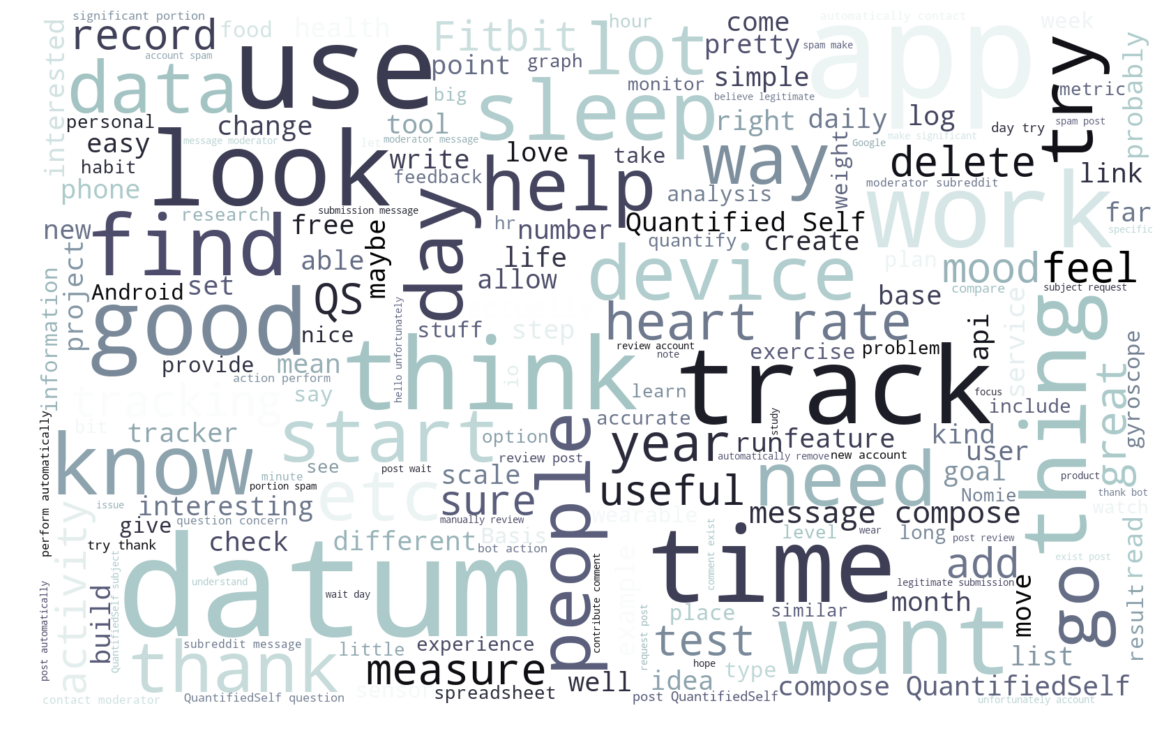

In [31]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

%matplotlib inline
wordcloud = WordCloud(width=1600, height=1000,
                      max_font_size=200,
                      colormap='bone', 
                      background_color='white').generate(corpus_lemma)
plt.figure(figsize=(20,20))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig('./images/word_cloud_3.png')
plt.show();

#### Frequency Distribution

In [32]:
nltk_tokens_lemma = word_tokenize(corpus_lemma)
print("First 15 word tokens: {}".format(nltk_tokens_lemma[:25]))

First 15 word tokens: ['try', 'find', 'Qualia', 'mind', 'tracking', 'sleep', 'Oura', 'ring', 'mind', 'sharing', 'datum', 'experience', 'blog', 'review', 'nee', 'confirm', 'find', 'take', 'Qualia', 'Mind', 'month', 'yes', 'affiliate', 'affiliate', 'link']


In [33]:
fdist_lemma = nltk.FreqDist(nltk_tokens_lemma)
print(fdist_lemma.most_common(50))

[('datum', 1505), ('app', 1149), ('like', 1045), ('track', 918), ('time', 795), ('day', 701), ('use', 699), ('sleep', 639), ('look', 616), ('want', 597), ('work', 566), ('good', 565), ('post', 531), ('think', 523), ('try', 505), ('thing', 476), ('thank', 462), ('know', 443), ('find', 414), ('tracking', 370), ('way', 347), ('account', 342), ('device', 314), ('message', 312), ('start', 311), ('new', 310), ('get', 307), ('QuantifiedSelf', 300), ('people', 294), ('help', 291), ('need', 290), ('go', 288), ('question', 286), ('automatically', 274), ('rate', 273), ('year', 266), ('lot', 249), ('heart', 249), ('review', 247), ('data', 247), ('etc', 246), ('test', 242), ('make', 241), ('remove', 240), ('great', 239), ('activity', 238), ('QS', 236), ('measure', 230), ('export', 223), ('mood', 218)]


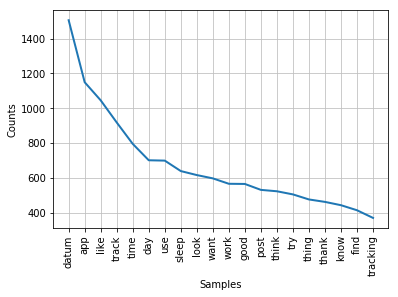

In [34]:
fdist_lemma.plot(20);

#### Bar Graph of Most Common Words

In [35]:
# Setting x values.
words_lst = []
for word in fdist_lemma.most_common(15):
    words_lst.append(word[0])
x = words_lst
print(x)

['datum', 'app', 'like', 'track', 'time', 'day', 'use', 'sleep', 'look', 'want', 'work', 'good', 'post', 'think', 'try']


In [36]:
# Setting y values.
counts_lst = []
for count in fdist_lemma.most_common(15):
    counts_lst.append(count[1])
y = counts_lst
print(y)

[1505, 1149, 1045, 918, 795, 701, 699, 639, 616, 597, 566, 565, 531, 523, 505]


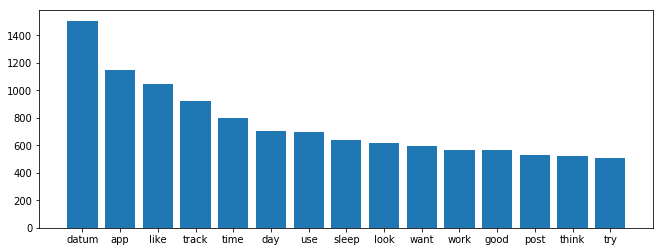

In [37]:
# Bar Graph of Most Common Words
plt.figure(figsize = (11,4))
plt.bar(x, y);
plt.savefig('./images/bar_graph_3.png');

#### Adding noise words to stopwords and removing them.

In [38]:
# Code from https://medium.com/@makcedward/nlp-pipeline-stop-words-part-5-d6770df8a936
customize_stop_words = [
    "data", "datum", "quantified", "self", "QS", "tracking", "track", "use"]

for w in customize_stop_words:
    nlp.vocab[w].is_stop = True
doc = nlp(corpus_lemma)
tokens = [token.text for token in doc if not token.is_stop]
print("First 15 tokens (doc): {}\n".format(tokens[:15]))

First 15 tokens (doc): ['try', 'find', 'Qualia', 'mind', 'sleep', 'Oura', 'ring', 'mind', 'sharing', 'experience', 'blog', 'review', 'nee', 'confirm', 'find']



#### Joining new tokens into corpus. 

In [39]:
corpus_no_stops = ''
for token in tokens:
    corpus_no_stops += token
    corpus_no_stops += " "

print("The corpus length is: {}\n".format(len(corpus_no_stops)))
print("First 2,500 characters of corpus:\n\n {}".format(corpus_no_stops[:2_500]))

The corpus length is: 644206

First 2,500 characters of corpus:

 try find Qualia mind sleep Oura ring mind sharing experience blog review nee confirm find Qualia Mind month yes affiliate affiliate link deep sleep sky rocket sit deep sleep hour sleep base oura ring finish bottle qualia mind caffeine free average deep sleep change high night deep sleep stop day ago happen deep sleep interesting drop stay review finding publish come week proof score article Qualia Mind find thing average sleep disorder sure good reference haha deep sleep score Qualia Mind Oura ring Users food app ability retrieve nutritional info text search barcode scan recent favorite Barcode search work offline type search favorite app handful app time stamping option write code USDA database Automate IFTTT waistline database date cease exist require internet spy user unfortunately require lot work waistline add useful feature pay year mfp Chronometer offline log useless case willing pay product year partly guarantee 

#### Visualizing text after custom stopwords removed.

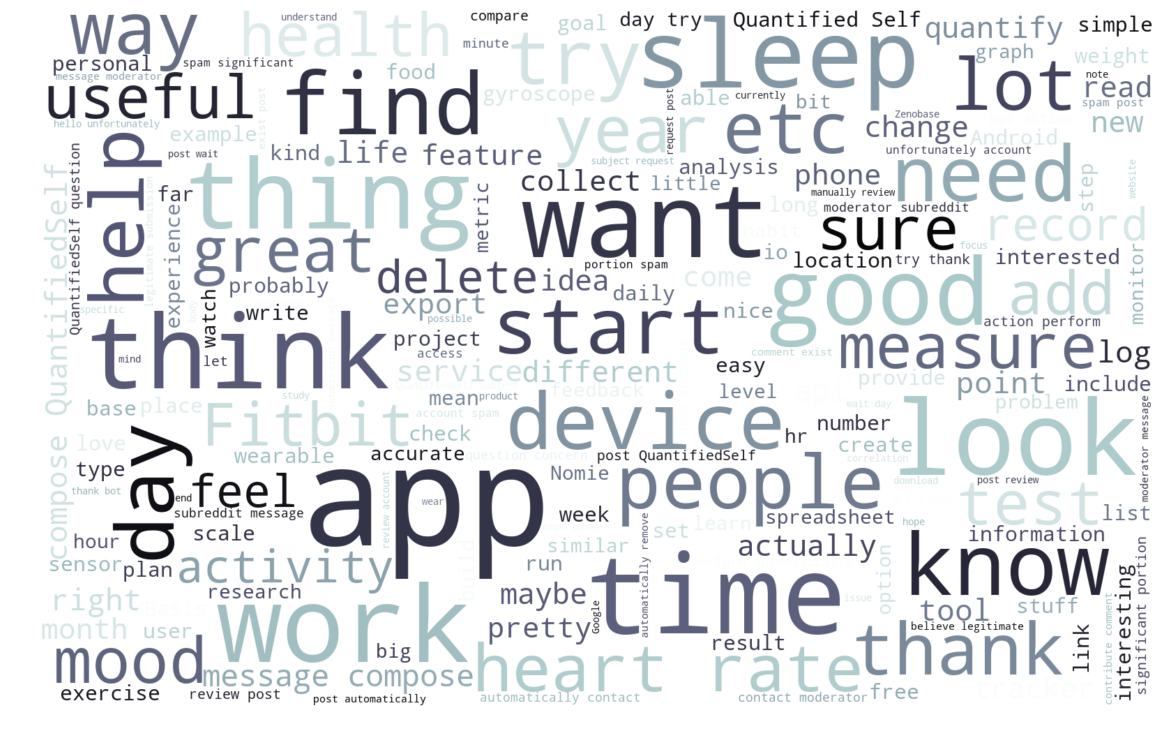

In [40]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

%matplotlib inline
wordcloud = WordCloud(width=1600, height=1000,
                      max_font_size=200,
                      colormap='bone', 
                      background_color='white').generate(corpus_no_stops)
plt.figure(figsize=(20,20))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig('./images/word_cloud_4.png');
plt.show();

#### Frequency Distribution

In [41]:
nltk_tokens_no_stops = word_tokenize(corpus_no_stops)
print("First 15 word tokens: {}".format(nltk_tokens_no_stops[:25]))

First 15 word tokens: ['try', 'find', 'Qualia', 'mind', 'sleep', 'Oura', 'ring', 'mind', 'sharing', 'experience', 'blog', 'review', 'nee', 'confirm', 'find', 'Qualia', 'Mind', 'month', 'yes', 'affiliate', 'affiliate', 'link', 'deep', 'sleep', 'sky']


In [42]:
fdist_no_stops = nltk.FreqDist(nltk_tokens_no_stops)
print(fdist_no_stops.most_common(50))

[('app', 1149), ('like', 1045), ('time', 795), ('day', 701), ('sleep', 639), ('look', 616), ('want', 597), ('work', 566), ('good', 565), ('post', 531), ('think', 523), ('try', 505), ('thing', 476), ('thank', 462), ('know', 443), ('find', 414), ('way', 347), ('account', 342), ('device', 314), ('message', 312), ('start', 311), ('new', 310), ('QuantifiedSelf', 300), ('people', 294), ('help', 291), ('need', 290), ('question', 286), ('automatically', 274), ('rate', 273), ('year', 266), ('lot', 249), ('heart', 249), ('review', 247), ('etc', 246), ('test', 242), ('remove', 240), ('great', 239), ('activity', 238), ('measure', 230), ('export', 223), ('mood', 218), ('exist', 217), ('subreddit', 212), ('Google', 211), ('delete', 210), ('tracker', 207), ('feel', 206), ('pretty', 204), ('life', 200), ('Quantified', 198)]


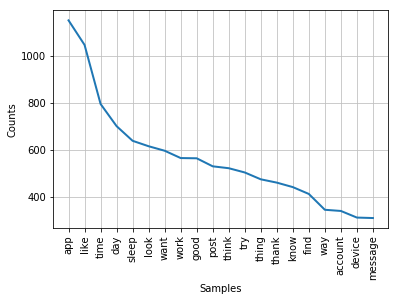

In [43]:
fdist_no_stops.plot(20);

#### Bar Graph of Most Common Words

In [44]:
# Setting x values.
words_lst = []
for word in fdist_no_stops.most_common(15):
    words_lst.append(word[0])
x = words_lst
print(x)

['app', 'like', 'time', 'day', 'sleep', 'look', 'want', 'work', 'good', 'post', 'think', 'try', 'thing', 'thank', 'know']


In [45]:
# Setting y values.
counts_lst = []
for count in fdist_no_stops.most_common(15):
    counts_lst.append(count[1])
y = counts_lst
print(y)

[1149, 1045, 795, 701, 639, 616, 597, 566, 565, 531, 523, 505, 476, 462, 443]


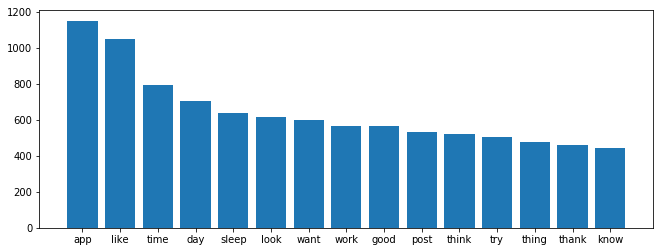

In [46]:
# Bar Graph of Most Common Words
plt.figure(figsize = (11,4))
plt.bar(x, y);
plt.savefig('./images/bar_graph_4.png');

In [ ]:
from spacy import displacy
corpus = corpus_no_stops[2_000:3_000]
doc_viz = nlp(corpus)
displacy.serve(doc_viz, style="ent")


Using the 'ent' visualizer
Serving on http://0.0.0.0:5000 ...



### Applying cleaning funtions, lemmatizing and removing stopwords in dataframe.

In [48]:
def first_cleaning(text):
    
    # Remove html.
    from bs4 import BeautifulSoup
    
    soup    = BeautifulSoup(text, 'html.parser')
    no_html = soup.get_text()
    
    # Remove duplicate text marked by ">"
    import re
    
    no_duplicates = re.sub(">.*", " ", no_html)
    
    # Remove urls.
    no_urls = re.sub("https{0,1}:\/\/\S*", " ", no_duplicates)
    
    # Remove punctuations (except apostraphes and hyphens)
    no_punctuation = re.sub("[^\w\'\-\s]+", " ", no_urls )
    
    # Remove hyphens, but combine hyphenated words.
    no_hyphens = re.sub("-", "", no_punctuation)
    
    # Remove digits.
    no_digits = re.sub("\d", " ", no_hyphens)
    
    # Remove extra whitespace. 
    no_whitespace = " ".join(no_digits.split())
    
    return no_whitespace

In [49]:
# First cleaning.
df['text'] = df['text'].apply(first_cleaning)
df.head()

,text
0,I'm trying to find someone who is using Qualia...
1,Most food tracking apps have the ability to re...
2,Why do you audiovideo record your life What ar...
3,This seems to be a major privacy concern for l...
4,If you've done your introductory stats you kno...


In [50]:
# Removing stop words
def remove_stopwords(text):
    doc = nlp(text)
    tokens = [token.text for token in doc if not token.is_stop]
    
    joined_tokens = ""
    for token in tokens:
        joined_tokens += token
        joined_tokens += " "
        
    return joined_tokens

In [51]:
df['text'] = df['text'].apply(remove_stopwords)
df.head()

,text
0,trying find Qualia Mind sleep Oura ring mind s...
1,food apps ability retrieve nutritional info te...
2,audiovideo record life capturing bit obtrusive...
3,major privacy concern little actual benefits p...
4,introductory stats know study design affects c...


In [52]:
def second_cleaning(text):
    
    # Single words removed.
    import re
    no_singles = re.sub(r"\b[a-zA-Z]\b", " ", text)

    # Remove apostraphes that did not get removed with spaCy's stopwords (contractions).
    no_apostraphes = re.sub(r"'", " ", no_singles)

    # Remove extra whitespace.
    no_xspaces = " ".join(no_apostraphes.split())
    
    return no_xspaces

In [53]:
# Second cleaning.
df['text'] = df['text'].apply(second_cleaning)
df.head()

,text
0,trying find Qualia Mind sleep Oura ring mind s...
1,food apps ability retrieve nutritional info te...
2,audiovideo record life capturing bit obtrusive...
3,major privacy concern little actual benefits p...
4,introductory stats know study design affects c...


In [54]:
# Lemmatizing
def lemmatize(text):
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc]
    
    joined_tokens = ""
    for token in tokens:
        joined_tokens += token
        joined_tokens += " "
        
    return joined_tokens

In [55]:
df['text'] = df['text'].apply(lemmatize)
df.head()

,text
0,try find Qualia Mind sleep Oura ring mind shar...
1,food app ability retrieve nutritional info tex...
2,audiovideo record life capture bit obtrusive t...
3,major privacy concern little actual benefit pr...
4,introductory stat know study design affect con...


In [56]:
# Removing custom stopwords.
def custom_stopwords(text):
    customize_stop_words = [
        "data", "datum", "quantified", "self", "QS", "tracking", "track", "use", "quantifiedself", "deleted",
        "removed", "delete", "remove"]

    for w in customize_stop_words:
        nlp.vocab[w].is_stop = True
    doc = nlp(text)
    tokens = [token.text for token in doc if not token.is_stop]

    joined_tokens = ""
    for token in tokens:
        joined_tokens += token
        joined_tokens += " "
        
    return joined_tokens

In [57]:
df['text'] = df['text'].apply(custom_stopwords)
df.head()

,text
0,try find Qualia Mind sleep Oura ring mind shar...
1,food app ability retrieve nutritional info tex...
2,audiovideo record life capture bit obtrusive t...
3,major privacy concern little actual benefit pr...
4,introductory stat know study design affect con...


In [58]:
df.to_csv('./data/cleaned_text.csv', index = False)